# Importing Libraries

In [121]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into numerical format
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score  # For evaluating accuracy of the model
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating the model's performance with confusion matrix and classification report

# Loading the dataset

In [122]:

# Load dataset ('spam.csv' is the file containing the dataset)
df = pd.read_csv("spam.csv", encoding="windows-1252")

In [123]:

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [124]:
# This ensures there are no NaN values in the DataFrame by filling them with empty strings
data=df.where((pd.notnull(df)),'')

In [125]:
# Check the first few rows of the dataset to understand its structure
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


# Data Preprocessing

In [126]:
# Displays a concise summary of the DataFrame 'data', including the number of non-null entries 
# and the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [127]:
#Displays the rows and column
data.shape

(5572, 5)

In [128]:
# Replace the 'v1' column values:
# - Set 'spam' entries to 0
# - Set 'ham' entries to 1
data.loc[data['v1'] == 'spam','v1',]=0
data.loc[data['v1'] == 'ham','v1',]=1

In [129]:
# Assign the 'v2' column to the feature variable 'X' 
# and the 'v1' column (target labels) to the variable 'Y'
X=data["v2"]
Y=data["v1"]

In [130]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [131]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

In [132]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [133]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [134]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


# Vectorization using TF-IDF

In [135]:
# Initialize the TfidfVectorizer for feature extraction
# - min_df=1 ensures that terms appearing in at least one document are considered
# - stop_words='english' removes common English stop words
# - lowercase=True ensures all text is converted to lowercase before processing
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit and transform the training data to extract features (X_train_features)
X_train_features = feature_extraction.fit_transform(X_train)  # Fit on X_train and transform into numerical features

# Transform the test data using the same feature extractor (X_test_features)
X_test_features = feature_extraction.transform(X_test)  # Transform X_test into numerical features using the fitted model

# Convert the target labels (Y_train and Y_test) to integer type for modeling
Y_train = Y_train.astype('int')  # Ensure Y_train is in integer format
Y_test = Y_test.astype('int')  # Ensure Y_test is in integer format


In [136]:
print(X_train)

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 4457, dtype: object


In [137]:
print(X_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7693 stored elements and shape (1115, 7472)>
  Coords	Values
  (0, 1756)	0.31111329907426943
  (0, 2679)	0.3500886226408095
  (0, 2974)	0.34299776014114036
  (0, 3239)	0.34299776014114036
  (0, 3457)	0.3500886226408095
  (0, 3752)	0.1718556592061185
  (0, 4543)	0.38197308370768035
  (0, 6816)	0.4006242977875035
  (0, 7229)	0.2947064107791228
  (1, 1934)	0.22392171769600464
  (1, 1970)	0.2461378627103295
  (1, 2651)	0.3269309971271071
  (1, 3716)	0.3178303138520559
  (1, 4760)	0.29866169283344046
  (1, 5532)	0.33866381848750327
  (1, 5738)	0.25559165628741076
  (1, 5739)	0.35520030142077386
  (1, 5744)	0.35520030142077386
  (1, 5812)	0.22078293973996208
  (1, 6604)	0.19484478334547534
  (1, 6607)	0.27039238853977376
  (2, 305)	0.31938690318093343
  (2, 2707)	0.4882288103453306
  (2, 3835)	0.4855870501823455
  (2, 4106)	0.5120683436791948
  :	:
  (1110, 1533)	0.2553888613819584
  (1110, 1599)	0.27571108916401915
  (1110, 1745)

# Model Training and Evaluation

In [138]:
# Initialize the Logistic Regression model
model = LogisticRegression()  # Create an instance of the Logistic Regression classifier

In [139]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [140]:
#For Prediction on training data
prediction_on_training_data=model.predict(X_train_features)
acc_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [141]:
print("accuracy on training_data =",acc_on_training_data)

accuracy on training_data = 0.9692618353152345


In [142]:
#For Prediction on testing data
prediction_on_test_data=model.predict(X_test_features)
acc_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [143]:
print("Accuracy on test data:", acc_on_test_data)

Accuracy on test data: 0.9524663677130045


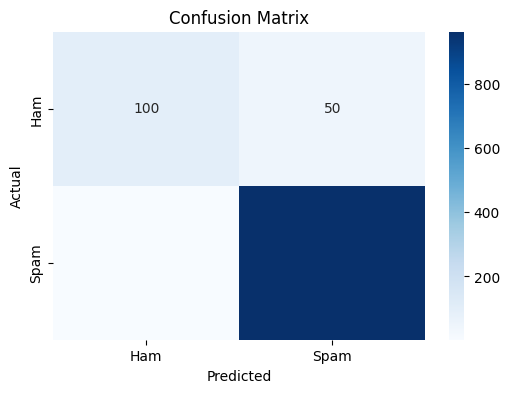


Classification Report:

              precision    recall  f1-score   support

         Ham       0.97      0.67      0.79       150
        Spam       0.95      1.00      0.97       965

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [144]:
# Make predictions on the test data using the trained logistic regression model
prediction_on_test_data = model.predict(X_test_features)  # Predict the labels (ham or spam) for the test set

# Compute the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(Y_test, prediction_on_test_data)  # Compare true labels (Y_test) with predicted labels

# Set up the plot for the confusion matrix visualization
plt.figure(figsize=(6, 4))  # Create a new figure with specified size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Plot the confusion matrix as a heatmap with annotations
            xticklabels=['Ham', 'Spam'],  # Set the x-axis labels
            yticklabels=['Ham', 'Spam'])  # Set the y-axis labels
plt.xlabel('Predicted')  # Label for the x-axis (Predicted labels)
plt.ylabel('Actual')  # Label for the y-axis (Actual labels)
plt.title('Confusion Matrix')  # Title of the confusion matrix plot
plt.show()  # Display the plot

# Print the classification report, which includes precision, recall, and F1-score
print("\nClassification Report:\n")
print(classification_report(Y_test, prediction_on_test_data, target_names=['Ham', 'Spam']))


# Predective System

In [145]:
input_your_mail=["Well, i'm gonna finish my bath now. Have a good...fine night."]
input_data_features=feature_extraction.transform(input_your_mail)
prediction=model.predict(input_data_features)

print(prediction)

if(prediction[0]==1):
    print("Ham mail")
else:
    print("Spam Hall")

[1]
Ham mail


In [146]:
input_your_mail=["WINNER!! As a valued network customer you have been selected to receivea 螢900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_data_features=feature_extraction.transform(input_your_mail)
prediction=model.predict(input_data_features)

print(prediction)

if(prediction[0]==1):
    print("Ham mail")
else:
    print("Spam Hall")

[0]
Spam Hall
